In [73]:
from collections import defaultdict

def parse_data (f_name, num):
    summoner_champions = defaultdict(list)    # key is summoner_id, val is the list of champions this user played
                                              # champions representation is (champion_id, champion_level, champion_points)
    summoner_rank = defaultdict(int)          # key is summoner_id, val is the rank
    champions_summoner = defaultdict(list)    # key is champion_id, val is the list of user_id who played this champion
    
    # skip = 0
    index = 0
    with open (f_name) as f:
        for line in f:
            if index >= num: break
            
            data = line.strip().split('-')
            if len(data) != 3:
                # skip += 1
                summoner = data[-3].split(',')[-1]
                champ_list = data[-2]
                rank = data[-1]
#                 for d in data:
#                     print(d)
#                 continue
            #summoner = 's_' + data[0]
            else:
                summoner = data[0]
                champ_list = data[1]
                rank = data[2]
            
            # process champ_list to get the list of tuples
            champ_list = champ_list.split(',')
            for i in range(len(champ_list)):
                champ_list[i] = champ_list[i].replace('(', '').replace(')', '')
            temp = []
            c_list = []
            for i in range(len(champ_list)):
                if champ_list[i] == '': continue
                    
                if i%3 == 0:
                    #temp.append('c_' + champ_list[i])
                    temp.append(champ_list[i])
                else:
                    temp.append(int(champ_list[i]))
                    
                if i%3 == 2:
                    c_list.append(tuple(temp))
                    temp = []
                i += 1
            
            summoner_champions[summoner] = c_list
            summoner_rank[summoner] = int(rank)
            for champ, l, p in c_list:
                champions_summoner[champ].append(summoner)
            
            index += 1
    #print(skip, 'lines were skipped.')        
    return summoner_champions, summoner_rank, champions_summoner

In [79]:
summoner_champions, summoner_rank, champions_summoner = parse_data('DataCrawling/playersInfo.txt', 2)
print(summoner_champions, '\n')
print(summoner_rank, '\n')
print(champions_summoner, '\n')

defaultdict(<class 'list'>, {'28347163': [('115', 5, 36488), ('412', 4, 16670), ('111', 3, 12345), ('420', 3, 12141), ('203', 3, 11308), ('3', 3, 10221), ('101', 3, 9007), ('74', 3, 8821), ('498', 3, 8423), ('150', 3, 8271), ('53', 3, 8147), ('45', 3, 7099), ('33', 3, 6748), ('41', 3, 6398), ('202', 3, 6240), ('161', 2, 5355), ('104', 2, 4824), ('9', 2, 4616), ('4', 2, 4523), ('35', 2, 4067), ('16', 2, 4047), ('90', 2, 4016), ('201', 2, 3990), ('25', 2, 3758), ('12', 2, 3756), ('30', 2, 3722), ('61', 2, 3513), ('240', 2, 3441), ('38', 2, 3396), ('99', 2, 3305), ('57', 2, 3203), ('432', 2, 3033), ('26', 2, 3001), ('31', 2, 2916), ('163', 2, 2914), ('44', 2, 2805), ('7', 2, 2758), ('136', 2, 2720), ('18', 2, 2647), ('24', 2, 2597), ('86', 2, 2519), ('236', 2, 2495), ('63', 2, 2450), ('17', 2, 2436), ('121', 2, 2430), ('34', 2, 2386), ('79', 2, 2298), ('103', 2, 2262), ('42', 2, 2237), ('157', 2, 2174), ('51', 2, 2156), ('98', 2, 2072), ('267', 2, 2059), ('113', 2, 1879), ('1', 2, 1853), 

In [74]:
summoner_champions, summoner_rank, champions_summoner = parse_data('DataCrawling/playersInfo.txt', 60000)

In [76]:
import matplotlib

print('There are', len(summoner_champions), 'summoners.')
print('There are', len(champions_summoner), 'champions.')

# Find top 50 most popular champions
champions_count = defaultdict(int)
for user, champ_list in summoner_champions.items():
    for champ, l, p in champ_list:
        champions_count[champ] += 1
        
popular_champs = [(champions_count[x], x) for x in champions_count]
popular_champs.sort()
popular_champs.reverse()
print(popular_champs[:50])

There are 51139 summoners.
There are 141 champions.
[(44777, '22'), (42265, '21'), (42122, '11'), (41993, '99'), (41880, '53'), (41690, '1'), (41173, '86'), (41062, '25'), (40658, '15'), (40257, '63'), (40176, '81'), (39978, '412'), (39883, '51'), (39785, '45'), (39362, '16'), (39099, '17'), (39041, '19'), (39010, '222'), (38968, '67'), (38762, '122'), (38762, '103'), (38537, '157'), (38502, '29'), (38396, '10'), (38359, '18'), (38111, '24'), (37898, '75'), (37822, '202'), (37408, '4'), (37331, '110'), (37302, '54'), (36889, '236'), (36877, '37'), (36873, '13'), (36868, '32'), (36796, '40'), (36734, '9'), (36692, '20'), (36305, '55'), (36268, '31'), (36196, '104'), (36133, '245'), (36103, '92'), (36025, '238'), (35963, '39'), (35952, '119'), (35806, '5'), (35744, '89'), (35682, '64'), (35602, '78')]


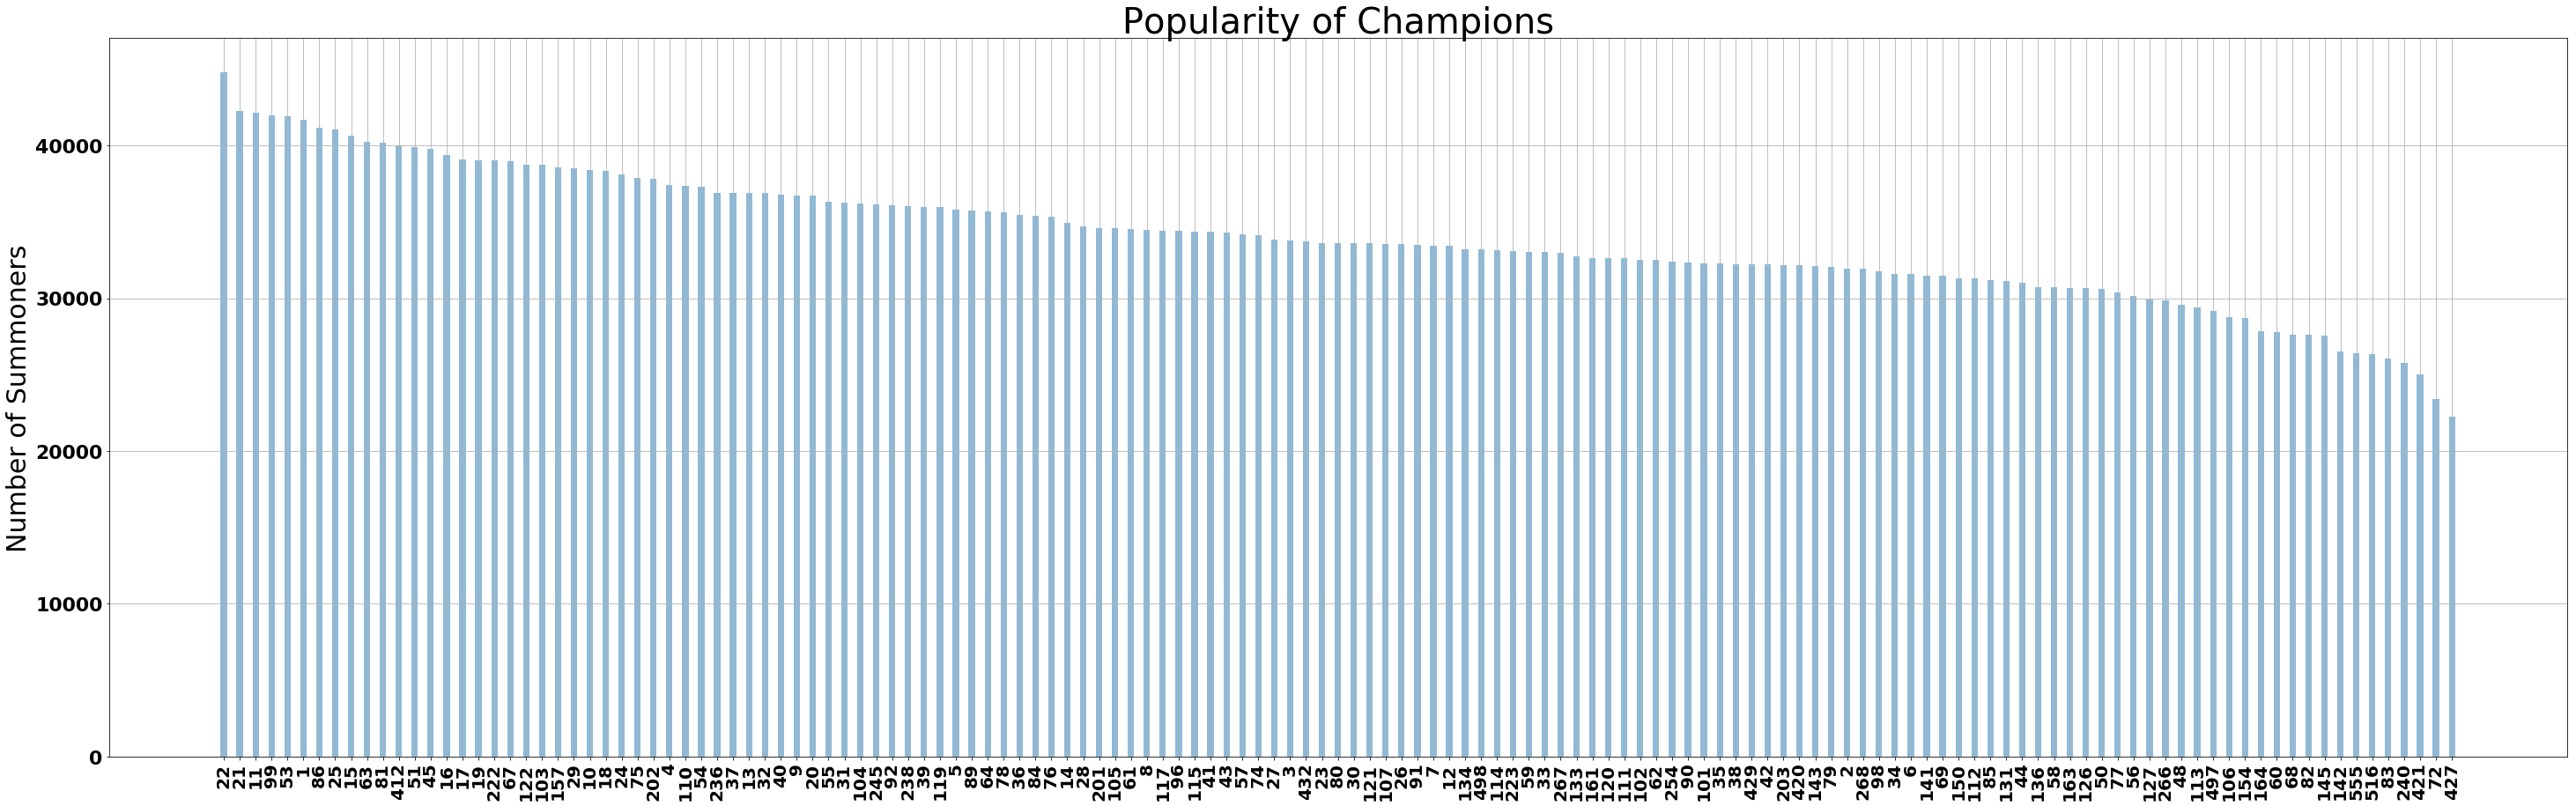

In [77]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

x_plot = [champ for count, champ in popular_champs]
y_plot = [count for count, champ in popular_champs]
 
y_pos = np.arange(len(x_plot))

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

f, ax = plt.subplots(figsize=(50,15))
plt.bar(y_pos, y_plot, align='center', alpha=0.5, width=0.4)
plt.xticks(y_pos, x_plot,rotation=90, fontsize=20)
plt.ylabel('Number of Summoners',fontsize=30)
plt.title('Popularity of Champions',fontsize=40)
plt.grid(True)
 
plt.show()